In [62]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [63]:
df = pd.read_csv('ad_spend.csv')
df.head()

,Ad Spend ($),Season,Revenue ($)
0,463,Monsoon,440
1,158,Winter,297
2,328,Monsoon,214
3,322,Monsoon,48
4,726,Winter,1048


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ad Spend ($)  200 non-null    int64 
 1   Season        200 non-null    object
 2   Revenue ($)   200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


In [65]:
df.Season.unique()

array(['Monsoon', 'Winter', 'Summer'], dtype=object)

In [66]:
season_group = df.groupby('Season').mean()

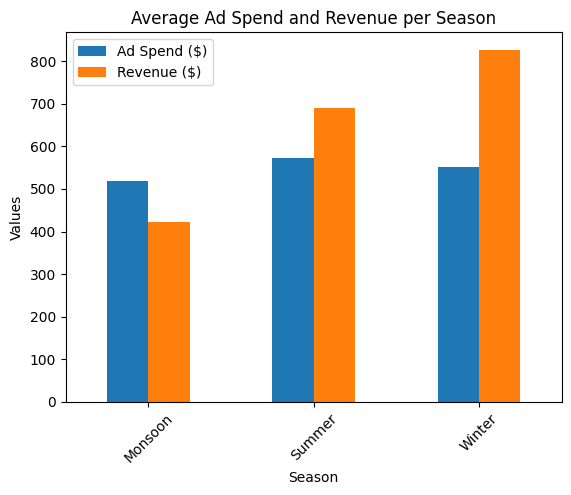

In [67]:
season_group.plot(kind='bar')
plt.title('Average Ad Spend and Revenue per Season')
plt.xlabel('Season')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

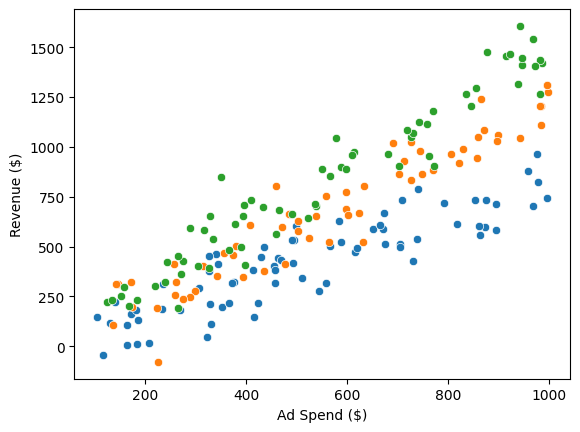

In [68]:
for season,sub_df in df.groupby("Season"):
    sns.scatterplot(x=sub_df['Ad Spend ($)'], y=sub_df['Revenue ($)'])

In [69]:
df = pd.get_dummies(df, columns=['Season'], drop_first=True)
df.columns

Index(['Ad Spend ($)', 'Revenue ($)', 'Season_Summer', 'Season_Winter'], dtype='object')

In [79]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Revenue ($)'])
y = df['Revenue ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10) 

In [80]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8882097000477289

In [81]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8972778553142061

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=150)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9118108812589474

In [83]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8708993041580124

In [ ]:
from sklearn.ensemble import r
